In [37]:
import tensorflow as tf
import os 

In [38]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [39]:
len(gpus)

1

In [40]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove dodgy imgs

In [41]:
#I download those imgs from the web using extention called download all imgs

In [42]:
import cv2 
import imghdr


In [43]:
data_dir = 'data'

In [44]:
image_exts = ['jpeg','jpg','bmp', 'png']

In [45]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('img not in ext list {}'.format(image_path))
                os.remove(image_path)
        except:
            print('issue with img {}'.format(image_path))
            #os.remove(image_path)

#load data

In [46]:
import numpy as np 
from matplotlib import pyplot as plt

In [47]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 803 files belonging to 2 classes.


In [48]:
data_iterator = data.as_numpy_iterator()

In [49]:
batch = data_iterator.next()

In [50]:
#imgs represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

# then we get 0 for cats and 1 for dogs

## Data preprocess 

In [51]:
#scaled = batch[0] / 255
#to scale the data from 1 to 0 
data = data.map(lambda x,y: (x/255, y))

In [52]:
scaled_iterator = data.as_numpy_iterator()

In [53]:
batch = scaled_iterator.next()

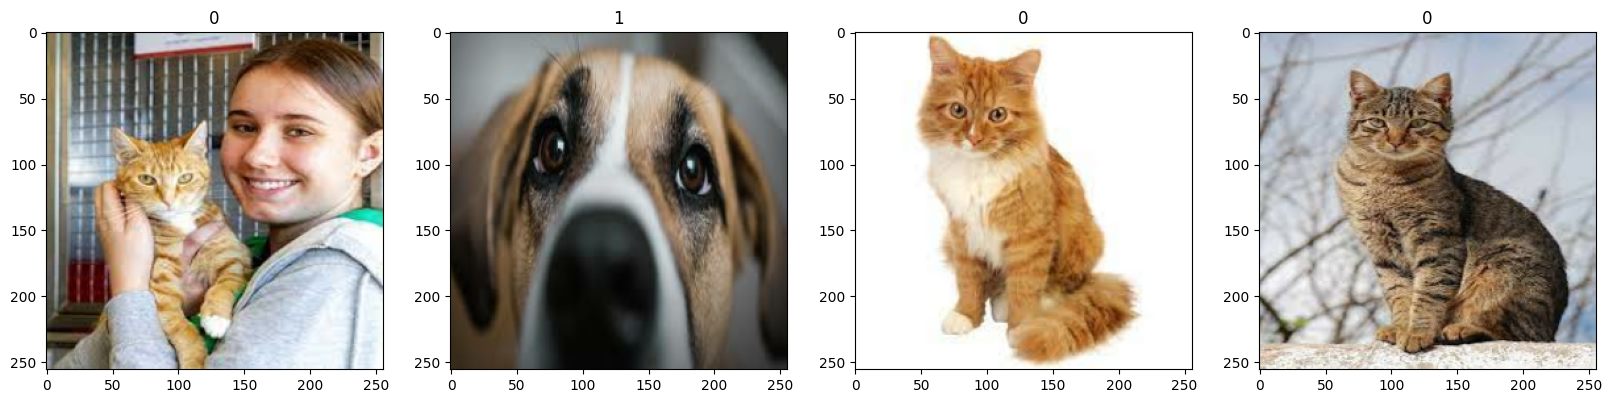

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [56]:
batch[0].max()

1.0

## SPLIT OUR DATA

In [57]:
len(data)

26

In [58]:
train_size =  int(len(data)* .7)
test_size = int(len(data)* .2)
val_size = int(len(data)* .1)+1

In [59]:
train_size+test_size+val_size

26

In [60]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [61]:
len(val)

3

## deep model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [66]:
model = Sequential()

In [67]:
#
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile('adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       